# Problem Statement:

### Predict the percentage of a student based on the number of study hours.

### The dataset contains 2 variables - Hours and Scores

### What will be the predicted score if a student studies for 9.25 hrs/day?

In [1]:
# Importing the pandas library with the alias as "pd" so as to perform various
# functions like loading the data into DataFrame
import pandas as pd

# Reading the dataset into the variable so as to start with the EDA
df = pd. read_csv(r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

# Displaying the first 5 rows of the DataFrame
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [2]:
# Using the describe() function to see basic statistical details about our
# dataset like percentile, mean, standard deviation, maximum, minimum etc
# This will help us analyze the data better and get a better understanding
print(df.describe())

# Starting the EDA with the task to see if there are any missing or null values
# in our dataset
print(df.isna().sum())


           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
Hours     0
Scores    0
dtype: int64


In [3]:
# We will now check if there any outliers present in our dataset

# An outlier is a data-item/ data point that deviates significantly from
# the rest of the data points.
# It can be of 2 types:-
# Univariate --> It is found when we look at distribution of a single variable
# Multivariate --> It is found when in an n-dimensional space so we have to
#                  look at distributions in multi-dimensions

# We can either visualization - 
# Box Plot --> It captures the summary of the data effectively and also 
# provides insight about 25h, 50th and 75th percentile, median 
# as well as outliers.
# Scatter Plot --> It is used when we want to determine the relationship
# between the 2 variables and can be used to detect any outlier(s)

# We can also use Inter-Quartile Range which is the difference between
# Quarter 3 and Quarter 1. In this method, we will define the base values
# wherein if the value is below or over, it is considered as an outlier.
# eg --> Q3 + 1.5*IQR > value > Q1 - 1.5IQR

# We can also use the Z score method. It tells us how far away a data point is
# from the mean. We can setup a threshold value, we can use it to define the
# outliers. Genrally it is chosen as 3.0 as 99.7% of the values lie between
# +3.0 and -3.0

<AxesSubplot:>

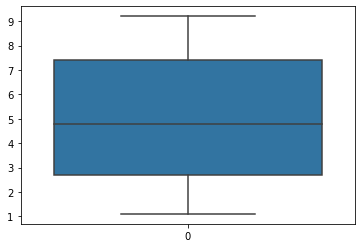

In [4]:
# Here I will use boxplot to see if there are any outliers present

# Importing seaborn library with alias as sns to plot the Box Plot
import seaborn as sns

# Plotting the Box Plot for Hours Column
sns.boxplot(data=df['Hours'])

<AxesSubplot:>

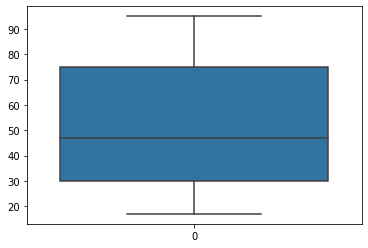

In [5]:
# Plotting the Box Plot for Scores Column
sns.boxplot(data =df['Scores'])

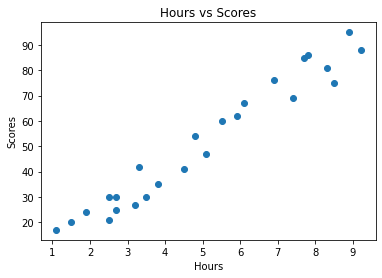

In [6]:
# As clearly seen above there were no outliers present.
# We can use scatter plot now to see if there is any linear relationship among 
# our two variables

# Importing the matplotlib.pylot library with alias as plt 
import matplotlib.pyplot as plt

# Plotting the Scatter Plot
plt.scatter(df['Hours'],df['Scores'])

# Adding label to the axes of our Scatter plot
plt.xlabel("Hours")          # Adding label to X-Axis
plt.ylabel("Scores")         # Adding label to Y-Axis
plt.title("Hours vs Scores") # Adding Title to our Plot

# Displaying the active figure object
plt.show()

In [7]:
# As clearly seen above, with the increasing value of "Hours", the "Scores"
# also increased linearly so there is a positive linear relationship among the 
# 2 variables - Scores and Hours
# Now we can start with our Supervised Machine Learning Linear Regression Model
# so as to make our Prediction.

In [8]:
# Here my Dependent variable is Hours.
X = df[['Hours']]
# And my Independent variable is Scores
Y = df[['Scores']]

In [9]:
# When comparing machine learning algorithms, it is desirable that they are fit
# and evaluated on the same subsets of the dataset.
# Importing train_test_split class so as to randomly divide our dataset between
# test and training sets
from sklearn.model_selection import train_test_split

# Importing linear Regression ML class
from sklearn.linear_model import LinearRegression

In [10]:
# Dividing the dataset
# test_size parameter --> It is used to define what %age of the data will 
#                         be used for testing   
# random_state parameter --> When comparing machine learning algorithms, it is
#                            desirable (perhaps required) that they are fit and
#                            evaluated on the same subsets of the dataset.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [11]:
# Creating an object of our Linear Regression ML class
model = LinearRegression()

# Fitting the ML object with the training values
model.fit(X_train,Y_train)

LinearRegression()

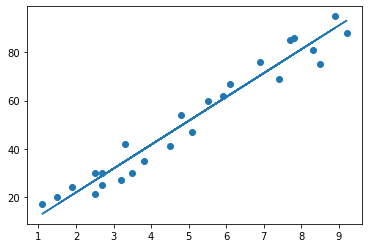

In [12]:
# Plotting the regression line ( y = mx+C)
line = model.coef_*X+model.intercept_

# Plotting for the training data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [13]:
# Prediction on test_dataset
y_pred = model.predict(X_test)

In [14]:
# Here we will now see some importanmt metrics on basis of 
# which we see whether the model is good or not such as R-square, MAE
# as well as also see the intercept and slope of our Model

# Calculating the R-squared value of our Model and then printing it
r_squared = model.score(X_train,Y_train)
print('Coefficient of Detemination is:',r_squared)

# Here we will see about Mean Absolute Error via the metrics class of sklearn
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))

# Printing the Slope or 'm' or 'Theta0' used in equation of the Linear Regression model
print("Slope is:",model.coef_)

# Printing the Intercept or 'c' or 'Theta1' used in equation of the Linear Regression model
print("Intercept is:",model.intercept_)

Coefficient of Detemination is: 0.9515510725211552
Mean Absolute Error: 4.183859899002975
Slope is: [[9.91065648]]
Intercept is: [2.01816004]


In [15]:
# Creating a DataFrame to store both the Actual 
# and Predicted Values for Comparison
pred = pd.DataFrame(Y_test)                #Storing Actual values
pred['Predicted Scores'] = y_pred          #Storing Predicted Values
pred.reset_index(drop=True, inplace=True)  #Resetting the index of the DataFrame

In [16]:
pred

,Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# What will be the predicted score if a student studies for 9.25 hrs/day?

In [17]:
print("The predicted score if a student studies for 9.25 hrs/day is : {}".format(model.predict([[9.25]])[0][0]))

The predicted score if a student studies for 9.25 hrs/day is : 93.69173248737538
